# ディープラーニングコードの説明

## 説明
このコードは以下の手順で実行されます：

### データの準備:
- MNISTデータセット（手書き数字）を読み込み
- データの正規化と前処理
- データローダーの設定

### モデルの構築:
- 2層のニューラルネットワークを作成
- 入力層（784ノード）→隠れ層（128ノード）→出力層（10ノード）

### 学習プロセス:
- 損失関数: クロスエントロピー損失
- 最適化手法: Adam
- エポック数: 5

## 数式の説明
モデルで使用される主な数式は以下の通りです：

### 活性化関数（ReLU）:

$f(x) = \max(0, x)$

### クロスエントロピー損失:

$L = -\sum_{i} y_i \log(\hat{y}_i)$

ここで、$y_i$は正解ラベル、$\hat{y}_i$はモデルの予測値です。

### 精度の計算:

$Accuracy = \frac{\text{正しく分類されたサンプル数}}{\text{全サンプル数}} \times 100$

## グラフの説明
コードは2つのグラフを生成します：

### 損失の推移:
- エポックごとの訓練損失の変化
- 損失が減少していれば、モデルが正しく学習していることを示します

### 精度の推移:
- エポックごとの訓練精度の変化
- 精度が上昇していれば、モデルの性能が向上していることを示します

このコードを実行すると、モデルは約95%以上の精度に達するはずです。

Epoch [1/5], Loss: 0.2817, Accuracy: 91.84%
Epoch [2/5], Loss: 0.1217, Accuracy: 96.43%
Epoch [3/5], Loss: 0.0849, Accuracy: 97.42%
Epoch [4/5], Loss: 0.0635, Accuracy: 98.08%
Epoch [5/5], Loss: 0.0503, Accuracy: 98.47%
Model parameters saved to mnist_model.pth


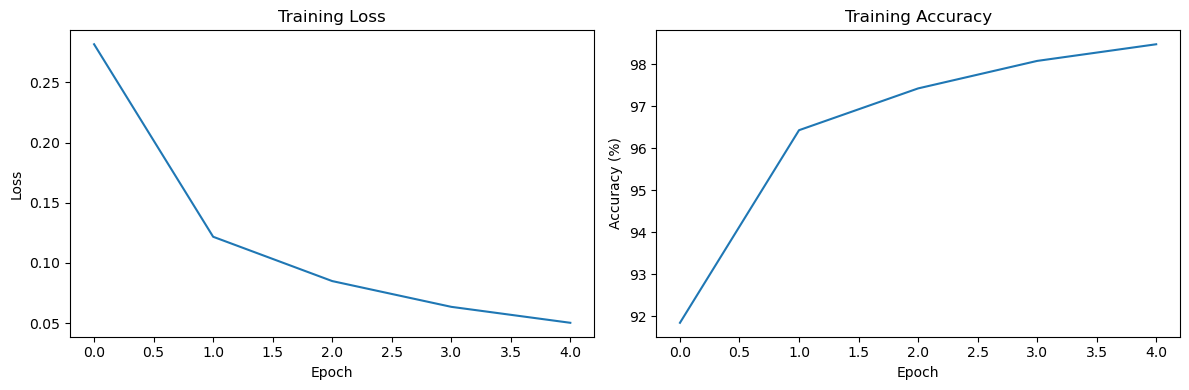

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# データの前処理とローダーの設定
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# データセットのダウンロードと準備
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                         train=True,
                                         transform=transform,
                                         download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=100,
                                         shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=100,
                                        shuffle=False)

# ニューラルネットワークの定義
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# モデル、損失関数、最適化手法の設定
model = NeuralNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 訓練用の変数
num_epochs = 5
train_losses = []
train_accs = []

# 訓練ループ
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # 順伝播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 逆伝播と最適化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')

# モデルのパラメータを保存
# CPU/GPUに依存せずパラメータを保存
model_cpu = model.to('cpu')
torch.save(model_cpu.state_dict(), 'mnist_model.pth')
print('Model parameters saved to mnist_model.pth')
# モデルを元のデバイスに戻す
model = model.to(device)

# 結果の可視化
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs)
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')

plt.tight_layout()
plt.show()

# 訓練したモデルを評価

モデルを評価中...
テストデータでの精度: 97.68%

結果を可視化中...


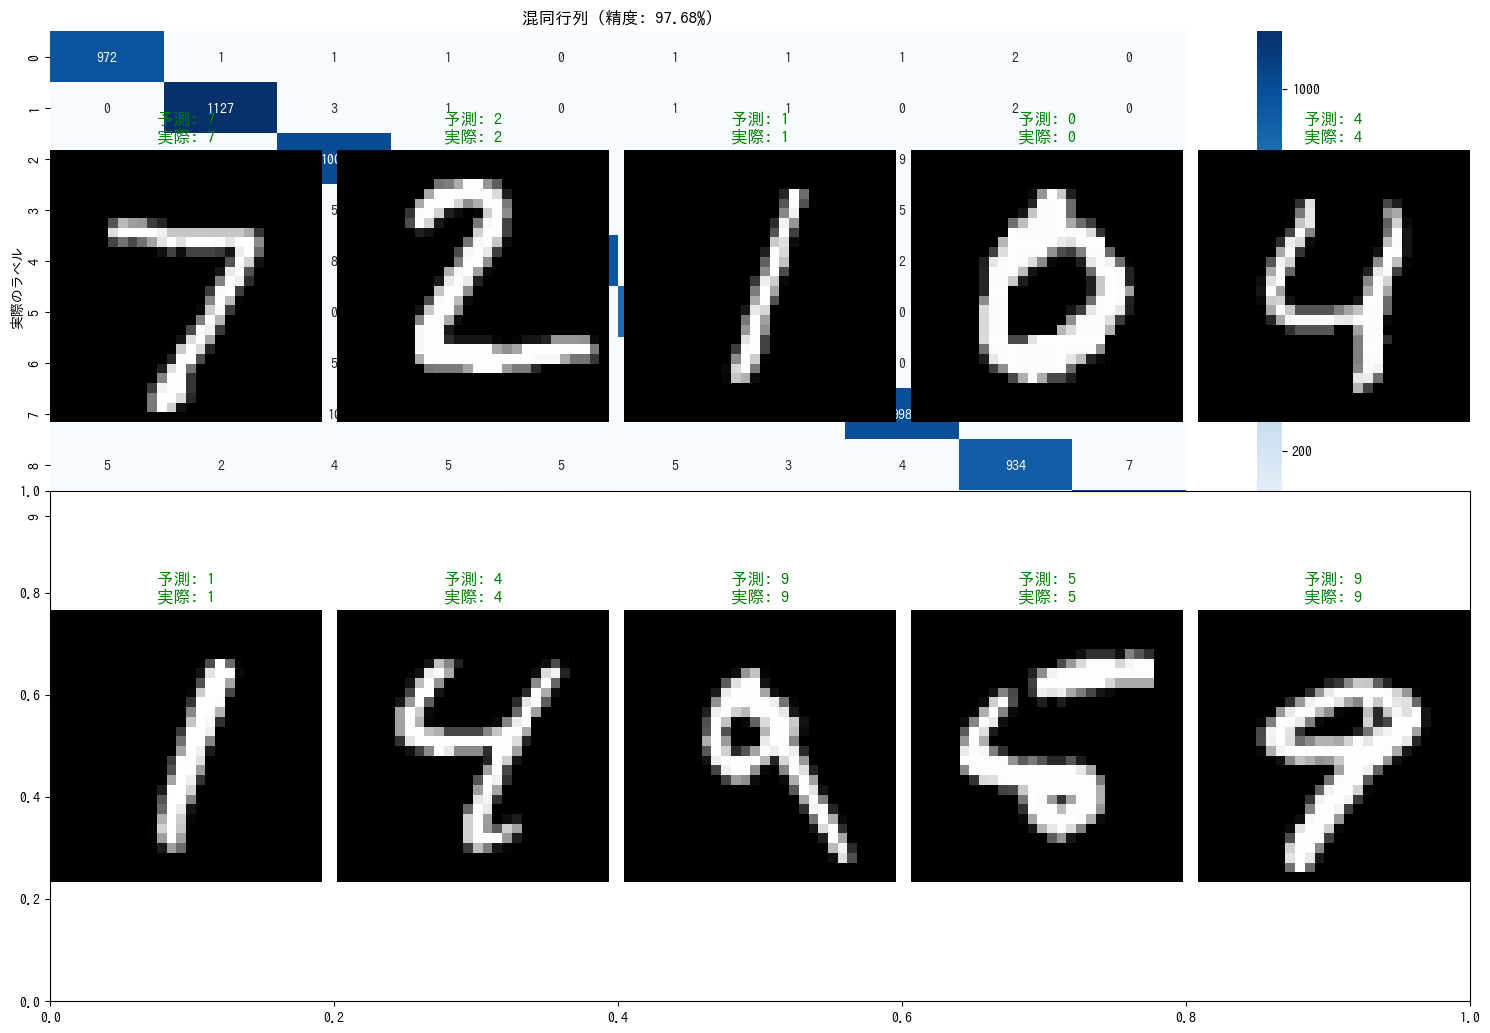

In [4]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# フォントの設定
plt.rcParams['font.family'] = 'TakaoGothic'

# デバイスの設定
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# モデルの定義（元のモデルと同じ構造）
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# テストデータの準備
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

test_dataset = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        transform=transform)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                        batch_size=100,
                                        shuffle=False)

# モデルの読み込みと評価
def evaluate_model():
    # モデルのインスタンス化と重みの読み込み
    model = NeuralNet().to(device)
    model.load_state_dict(torch.load('mnist_model.pth'))
    model.eval()  # 評価モード

    # テストデータでの評価
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    example_images = []
    example_preds = []
    example_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # 予測結果の保存（混同行列用）
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            
            # サンプル画像の保存（最初の10個）
            if len(example_images) < 10:
                example_images.extend(images[:10].cpu().numpy())
                example_preds.extend(predicted[:10].cpu().numpy())
                example_labels.extend(labels[:10].cpu().numpy())

    accuracy = 100 * correct / total
    return accuracy, all_preds, all_labels, example_images, example_preds, example_labels

# 結果の可視化
def visualize_results(accuracy, all_preds, all_labels, example_images, example_preds, example_labels):
    plt.figure(figsize=(15, 10))
    
    # 混同行列の表示
    plt.subplot(2, 1, 1)
    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'混同行列 (精度: {accuracy:.2f}%)')
    plt.xlabel('予測ラベル')
    plt.ylabel('実際のラベル')
    
    # サンプル画像と予測結果の表示
    plt.subplot(2, 1, 2)
    fig = plt.gcf()
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(example_images[i].squeeze(), cmap='gray')
        color = 'green' if example_preds[i] == example_labels[i] else 'red'
        plt.title(f'予測: {example_preds[i]}\n実際: {example_labels[i]}', 
                 color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# メイン処理
def main():
    print("モデルを評価中...")
    accuracy, all_preds, all_labels, example_images, example_preds, example_labels = evaluate_model()
    print(f"テストデータでの精度: {accuracy:.2f}%")
    
    print("\n結果を可視化中...")
    visualize_results(accuracy, all_preds, all_labels, example_images, example_preds, example_labels)

if __name__ == "__main__":
    main()

# ニューラルネットワークの可視化


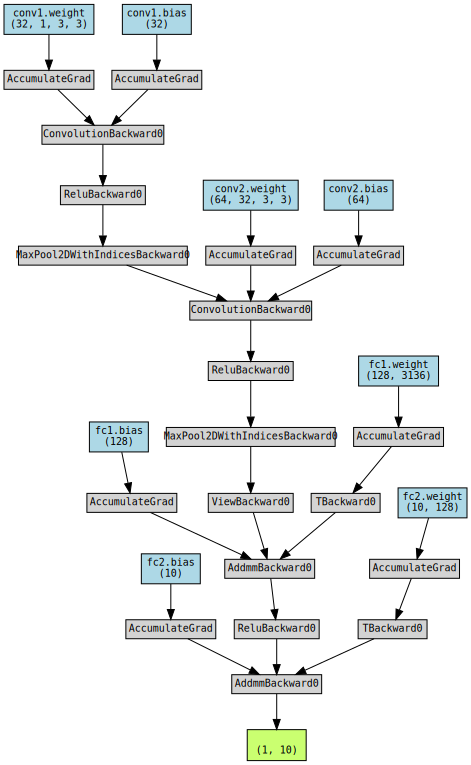

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from IPython.display import Image, display

# CNNモデルの定義
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # 畳み込み層1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # 畳み込み層2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # プーリング層
        self.pool = nn.MaxPool2d(2)
        # 全結合層1
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # 全結合層2（出力層）
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# モデルのインスタンス化
model = SimpleCNN()

# サンプル入力の作成（MNISTの入力サイズ: 1x28x28）
x = torch.randn(1, 1, 28, 28)

# モデルの構造を可視化
output = model(x)
dot = make_dot(output, params=dict(model.named_parameters()))

# Jupyter Notebookにグラフを表示
display(dot)

# ReLU関数とシグモイド関数の違い
ReLU関数とシグモイド関数は、ニューラルネットワークで使用される代表的な活性化関数です。
 
## ReLU関数の特徴:
 - 入力が0以上の場合はそのまま出力し、0未満の場合は0を出力する単純な関数
 - 勾配消失問題が起きにくい
 - 計算コストが低い
 - 現代のディープラーニングで最も一般的に使用される

### 微分可能性について

ReLU関数は厳密には $x = 0$ で微分不可能です。その理由は：
- $x > 0$ での傾きは1
- $x < 0$ での傾きは0
- $x = 0$ では傾きが不連続（角がある）

しかし、$x = 0$ での微分値を便宜的に0または1と定義することで、実用上の問題は生じません。

一般的に使用される ReLU の微分は：

$$
f'(x) = \begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

## シグモイド関数の特徴:
 - 入力を0から1の範囲に変換する滑らかなS字カーブ
 - 出力が確率として解釈可能
 - 勾配消失問題が起きやすい
 - 主に二値分類問題の出力層で使用される

## 使い分け:
 - 中間層: 一般的にReLU関数を使用
 - 出力層: タスクに応じて選択（分類ならソフトマックス、二値分類ならシグモイド）

## 数式による表現:
 
### ReLU関数:
$f(x) = \max(0, x)$
 
### シグモイド関数:
 $f(x) = \frac{1}{1 + e^{-x}}$
 
## 導関数:
### ReLU関数: 
$f'(x) = \begin{cases} 1 & \text{if } x > 0 \\ 0 & \text{if } x < 0 \end{cases}$

### シグモイド関数: 
$f'(x) = f(x)(1-f(x))$


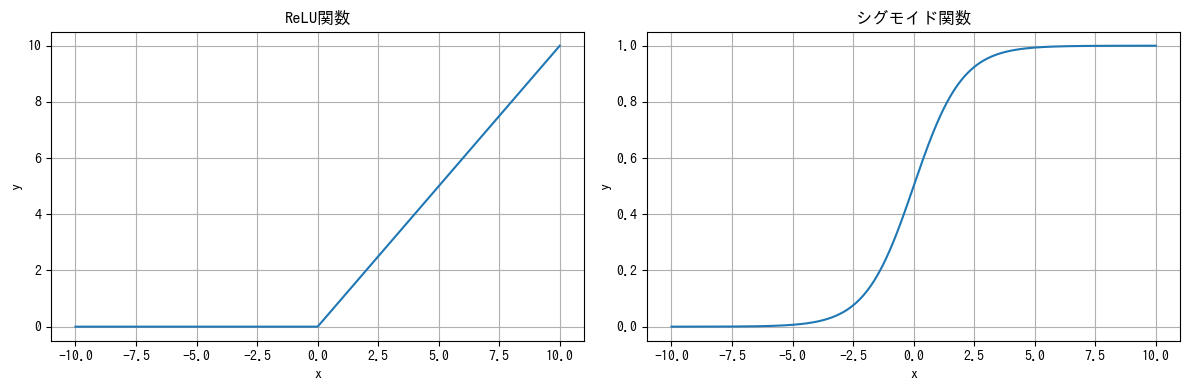

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# フォントの設定
plt.rcParams['font.family'] = 'TakaoGothic'


# データの生成
x = np.linspace(-10, 10, 1000)

# ReLU関数の定義と計算
def relu(x):
    return np.maximum(0, x)

# シグモイド関数の定義と計算
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# プロットの設定
plt.figure(figsize=(12, 4))

# ReLU関数のプロット
plt.subplot(1, 2, 1)
plt.plot(x, relu(x))
plt.grid(True)
plt.title('ReLU関数')
plt.xlabel('x')
plt.ylabel('y')

# シグモイド関数のプロット
plt.subplot(1, 2, 2)
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.title('シグモイド関数')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()


## 誤差逆伝播法（バックプロパゲーション）

誤差逆伝播法は、ニューラルネットワークの重みを更新するためのアルゴリズムです。以下にその基本的な数式を示します。

### 順伝播

まず、入力 $\mathbf{x}$ を用いて各層の出力を計算します。例えば、ある層 $l$ の出力 $\mathbf{a}^{(l)}$ は次のように計算されます：

$$
\mathbf{z}^{(l)} = \mathbf{W}^{(l)} \mathbf{a}^{(l-1)} + \mathbf{b}^{(l)}
$$

$$
\mathbf{a}^{(l)} = f(\mathbf{z}^{(l)})
$$

ここで、$\mathbf{W}^{(l)}$ は重み行列、$\mathbf{b}^{(l)}$ はバイアスベクトル、$f$ は活性化関数です。

### 誤差の計算

出力層での誤差 $\delta^{(L)}$ は、損失関数 $L$ を用いて次のように計算されます：

$$
\delta^{(L)} = \nabla_a L \odot f'(\mathbf{z}^{(L)})
$$

ここで、$\nabla_a L$ は損失関数の出力に対する勾配、$\odot$ は要素ごとの積、$f'$ は活性化関数の微分です。

### 逆伝播

誤差を逆方向に伝播させ、各層の誤差を計算します。層 $l$ の誤差 $\delta^{(l)}$ は次のように計算されます：

$$
\delta^{(l)} = (\mathbf{W}^{(l+1)})^T \delta^{(l+1)} \odot f'(\mathbf{z}^{(l)})
$$

### 重みの更新

各層の重みとバイアスは、学習率 $\eta$ を用いて次のように更新されます：

$$
\mathbf{W}^{(l)} = \mathbf{W}^{(l)} - \eta \cdot \delta^{(l)} (\mathbf{a}^{(l-1)})^T
$$

$$
\mathbf{b}^{(l)} = \mathbf{b}^{(l)} - \eta \cdot \delta^{(l)}
$$

このプロセスを繰り返すことで、ニューラルネットワークは学習を進めます。

### 誤差 $\delta^{(L)}$ の導出

#### 1. 基本的な考え方
ニューラルネットワークの学習では、重み $W$ とバイアス $b$ を調整して損失関数 $L$ を最小化することが目標です。
この調整のために、損失関数の偏微分（勾配）を計算する必要があります。

#### 2. 連鎖律による導出
出力層での誤差 $\delta^{(L)}$ は、損失関数 $L$ の $z^{(L)}$ に関する偏微分として定義されます：

$$
\delta^{(L)} = \frac{\partial L}{\partial z^{(L)}}
$$

この偏微分は連鎖律を使って以下のように展開できます：

$$
\frac{\partial L}{\partial z^{(L)}} = \frac{\partial L}{\partial a^{(L)}} \cdot \frac{\partial a^{(L)}}{\partial z^{(L)}}
$$

ここで：
- $\frac{\partial L}{\partial a^{(L)}}$ は損失関数の出力に関する勾配（$\nabla_a L$）
- $\frac{\partial a^{(L)}}{\partial z^{(L)}}$ は活性化関数の微分（$f'(z^{(L)})$）

#### 3. 要素ごとの積による表現
行列形式で表現すると：

$$
\delta^{(L)} = \nabla_a L \odot f'(\mathbf{z}^{(L)})
$$

ここで $\odot$ は要素ごとの積（アダマール積）を表します。

#### 4. 具体例（2クラス分類の場合）
例えば、2クラス分類でシグモイド関数を使用する場合：

1. シグモイド関数：
   $$f(z) = \frac{1}{1 + e^{-z}}$$

2. シグモイド関数の微分：
   $$f'(z) = f(z)(1-f(z))$$

3. 交差エントロピー損失：
   $$L = -y\log(a) - (1-y)\log(1-a)$$
   ここで $y$ は正解ラベル、$a$ は予測値

4. これらを組み合わせると：
   $$\delta^{(L)} = (a-y) \odot [a(1-a)]$$
   
   ここで $(a-y)$ は $\nabla_a L$ に相当し、$a(1-a)$ は $f'(z^{(L)})$ に相当します。

#### 5. この式の意味
- $\nabla_a L$ は「予測値と正解値の差」を表し、誤差の方向と大きさを示します
- $f'(\mathbf{z}^{(L)})$ は活性化関数の傾きを表し、重みの更新量を調整します
- これらの積により、適切な学習の度合いが決定されます

### 誤差の伝播と漸化式による理解

#### 1. 基本的な考え方
ニューラルネットワークの各層での誤差は、後ろの層から前の層へと伝播していきます。これは漸化式として表現できます。

#### 2. 誤差の漸化式表現

出力層（第L層）から始まり、前の層へ順番に誤差を計算していく過程は以下のように表せます：

1. 出力層（初項）：
   $$\delta^{(L)} = \nabla_a L \odot f'(\mathbf{z}^{(L)})$$

2. 中間層（漸化式）：
   $$\delta^{(l)} = (\mathbf{W}^{(l+1)})^T \delta^{(l+1)} \odot f'(\mathbf{z}^{(l)})$$
   ここで、$l = L-1, L-2, ..., 1$

#### 3. 具体例での理解
3層ニューラルネットワーク（入力層、隠れ層、出力層）の場合：

1. 出力層（$l=3$）での誤差：
   $$\delta^{(3)} = \nabla_a L \odot f'(\mathbf{z}^{(3)})$$

2. 隠れ層（$l=2$）での誤差：
   $$\delta^{(2)} = (\mathbf{W}^{(3)})^T \delta^{(3)} \odot f'(\mathbf{z}^{(2)})$$

3. 入力層（$l=1$）での誤差：
   $$\delta^{(1)} = (\mathbf{W}^{(2)})^T \delta^{(2)} \odot f'(\mathbf{z}^{(1)})$$

#### 4. 数列としての特徴

1. **単調性**：
   - 一般的に、誤差は出力層から入力層に向かうにつれて小さくなる傾向があります
   - これは「勾配消失問題」として知られる現象の原因の一つです

2. **収束性**：
   $$\lim_{n \to \infty} \|\delta^{(l)}\| \to 0$$
   （ここで $n$ は学習の繰り返し回数）

#### 5. 漸化式の特性

1. **再帰的な性質**：
   - 各層の誤差は、必ず一つ後ろの層の誤差を使って計算されます
   - これは数列の漸化式の基本的な性質と同じです

2. **一般項の表現**：
   任意の層 $l$ の誤差は以下の形で表現できます：
   $$\delta^{(l)} = \prod_{i=l+1}^{L} [(\mathbf{W}^{(i)})^T \odot f'(\mathbf{z}^{(i-1)})] \cdot \delta^{(L)}$$

#### 6. 実践的な意味

1. **学習率の調整**：
   - 漸化式の性質から、層が深くなるほど誤差が小さくなることがわかります
   - そのため、深い層では大きめの学習率が必要になることがあります

2. **最適化の方針**：
   $$\mathbf{W}^{(l)}_{new} = \mathbf{W}^{(l)}_{old} - \eta \cdot \delta^{(l)} (\mathbf{a}^{(l-1)})^T$$
   - この更新式も一種の漸化式と見なすことができます

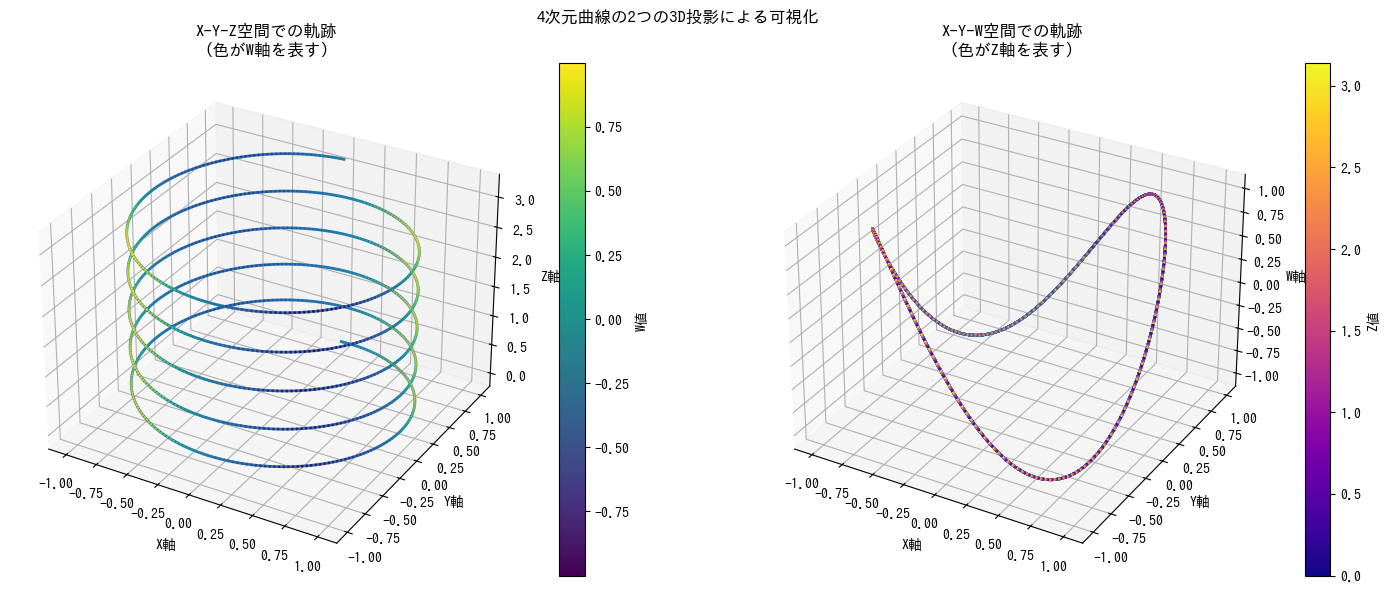

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# データの生成
t = np.linspace(0, 10*np.pi, 1000)  # パラメータ

# らせん状の4次元曲線を生成
x = np.sin(t)
y = np.cos(t)
z = t/10
w = np.sin(2*t)  # 4次元目

# プロットの作成
fig = plt.figure(figsize=(15, 6))

# 左側のプロット (X-Y-Z)
ax1 = fig.add_subplot(121, projection='3d')
line1 = ax1.plot(x, y, z, lw=2)
# 色付けを追加
points1 = ax1.scatter(x, y, z, c=w, cmap='viridis', s=1)
ax1.set_xlabel('X軸')
ax1.set_ylabel('Y軸')
ax1.set_zlabel('Z軸')
ax1.set_title('X-Y-Z空間での軌跡\n(色がW軸を表す)')

# 右側のプロット (X-Y-W)
ax2 = fig.add_subplot(122, projection='3d')
line2 = ax2.plot(x, y, w, lw=2)
# 色付けを追加
points2 = ax2.scatter(x, y, w, c=z, cmap='plasma', s=1)
ax2.set_xlabel('X軸')
ax2.set_ylabel('Y軸')
ax2.set_zlabel('W軸')
ax2.set_title('X-Y-W空間での軌跡\n(色がZ軸を表す)')

# カラーバーの追加
plt.colorbar(points1, ax=ax1, label='W値')
plt.colorbar(points2, ax=ax2, label='Z値')

plt.suptitle('4次元曲線の2つの3D投影による可視化')
plt.tight_layout()
plt.show()

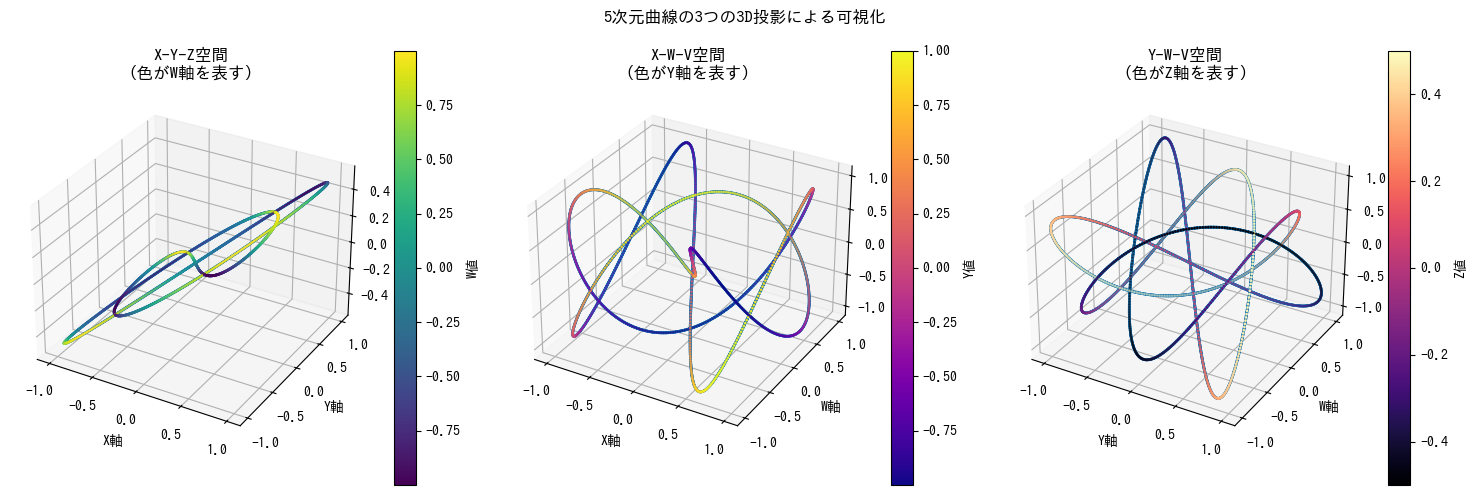

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 5次元のパラメトリック方程式のデータ生成
t = np.linspace(0, 4*np.pi, 1000)
x = np.sin(2*t)
y = np.cos(3*t)
z = np.sin(t) * np.cos(t)
w = np.sin(4*t)
v = np.cos(5*t)

# プロットの作成
fig = plt.figure(figsize=(15, 5))

# 1つ目のプロット (X-Y-Z)
ax1 = fig.add_subplot(131, projection='3d')
line1 = ax1.plot(x, y, z, lw=2)
points1 = ax1.scatter(x, y, z, c=w, cmap='viridis', s=1)
ax1.set_xlabel('X軸')
ax1.set_ylabel('Y軸')
ax1.set_zlabel('Z軸')
ax1.set_title('X-Y-Z空間\n(色がW軸を表す)')

# 2つ目のプロット (X-W-V)
ax2 = fig.add_subplot(132, projection='3d')
line2 = ax2.plot(x, w, v, lw=2)
points2 = ax2.scatter(x, w, v, c=y, cmap='plasma', s=1)
ax2.set_xlabel('X軸')
ax2.set_ylabel('W軸')
ax2.set_zlabel('V軸')
ax2.set_title('X-W-V空間\n(色がY軸を表す)')

# 3つ目のプロット (Y-W-V)
ax3 = fig.add_subplot(133, projection='3d')
line3 = ax3.plot(y, w, v, lw=2)
points3 = ax3.scatter(y, w, v, c=z, cmap='magma', s=1)
ax3.set_xlabel('Y軸')
ax3.set_ylabel('W軸')
ax3.set_zlabel('V軸')
ax3.set_title('Y-W-V空間\n(色がZ軸を表す)')

# カラーバーの追加
plt.colorbar(points1, ax=ax1, label='W値')
plt.colorbar(points2, ax=ax2, label='Y値')
plt.colorbar(points3, ax=ax3, label='Z値')

plt.suptitle('5次元曲線の3つの3D投影による可視化')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 8次元のパラメトリック方程式のデータ生成
t = np.linspace(0, 4*np.pi, 1000)
x = np.sin(2*t)
y = np.cos(3*t)
z = np.sin(t) * np.cos(t)
w = np.sin(4*t)
v = np.cos(5*t)
u = np.sin(6*t)
p = np.cos(7*t)
q = np.sin(8*t)

# プロットの作成
fig = plt.figure(figsize=(20, 10))

# 1つ目のプロット (X-Y-Z)
ax1 = fig.add_subplot(231, projection='3d')
scatter1 = ax1.scatter(x, y, z, c=w, s=np.abs(v)*100+50, cmap='viridis', alpha=0.6)
ax1.set_xlabel('X軸')
ax1.set_ylabel('Y軸')
ax1.set_zlabel('Z軸')
ax1.set_title('X-Y-Z空間\n(色がW軸、サイズがV軸)')

# 2つ目のプロット (W-V-U)
ax2 = fig.add_subplot(232, projection='3d')
scatter2 = ax2.scatter(w, v, u, c=p, s=np.abs(q)*100+50, cmap='plasma', alpha=0.6)
ax2.set_xlabel('W軸')
ax2.set_ylabel('V軸')
ax2.set_zlabel('U軸')
ax2.set_title('W-V-U空間\n(色がP軸、サイズがQ軸)')

# 3つ目のプロット (X-U-P)
ax3 = fig.add_subplot(233, projection='3d')
scatter3 = ax3.scatter(x, u, p, c=y, s=np.abs(z)*100+50, cmap='magma', alpha=0.6)
ax3.set_xlabel('X軸')
ax3.set_ylabel('U軸')
ax3.set_zlabel('P軸')
ax3.set_title('X-U-P空間\n(色がY軸、サイズがZ軸)')

# 4つ目のプロット (Y-V-Q)
ax4 = fig.add_subplot(234, projection='3d')
scatter4 = ax4.scatter(y, v, q, c=x, s=np.abs(w)*100+50, cmap='coolwarm', alpha=0.6)
ax4.set_xlabel('Y軸')
ax4.set_ylabel('V軸')
ax4.set_zlabel('Q軸')
ax4.set_title('Y-V-Q空間\n(色がX軸、サイズがW軸)')

# 5つ目のプロット (Z-P-U)
ax5 = fig.add_subplot(235, projection='3d')
scatter5 = ax5.scatter(z, p, u, c=v, s=np.abs(q)*100+50, cmap='rainbow', alpha=0.6)
ax5.set_xlabel('Z軸')
ax5.set_ylabel('P軸')
ax5.set_zlabel('U軸')
ax5.set_title('Z-P-U空間\n(色がV軸、サイズがQ軸)')

# 6つ目のプロット (W-Q-X)
ax6 = fig.add_subplot(236, projection='3d')
scatter6 = ax6.scatter(w, q, x, c=u, s=np.abs(p)*100+50, cmap='twilight', alpha=0.6)
ax6.set_xlabel('W軸')
ax6.set_ylabel('Q軸')
ax6.set_zlabel('X軸')
ax6.set_title('W-Q-X空間\n(色がU軸、サイズがP軸)')

# カラーバーの追加
plt.colorbar(scatter1, ax=ax1, label='W値')
plt.colorbar(scatter2, ax=ax2, label='P値')
plt.colorbar(scatter3, ax=ax3, label='Y値')
plt.colorbar(scatter4, ax=ax4, label='X値')
plt.colorbar(scatter5, ax=ax5, label='V値')
plt.colorbar(scatter6, ax=ax6, label='U値')

plt.suptitle('8次元曲線の6つの3D投影による可視化\n各投影は3次元の空間座標 + 色(1次元) + マーカーサイズ(1次元)で表現', 
             fontsize=14)
plt.tight_layout()
plt.show()